## This notebook demos Python data visualizations on the Iris dataset

This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the [kaggle/python docker image](https://github.com/kaggle/docker-python)

We'll use three libraries for this tutorial: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

Press "Fork" at the top-right of this screen to run this notebook yourself and build each of the examples.

In [63]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import seaborn as sns
import matplotlib.pyplot as plt

# Next, we'll load the Iris flower dataset, which inside the directory
iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Press shift+enter to execute this cell

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
# Let's see how many examples we have of each species
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

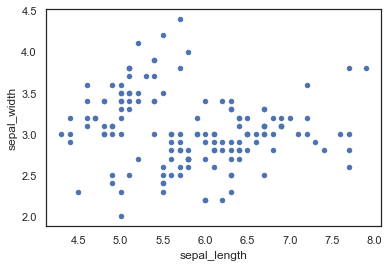

In [65]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

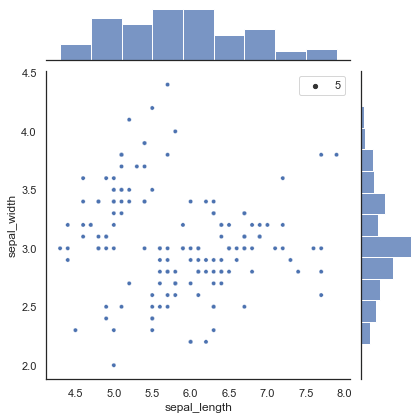

In [66]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

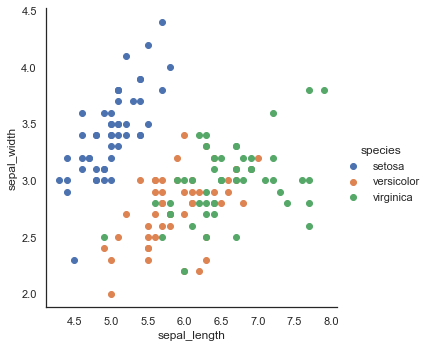

In [67]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

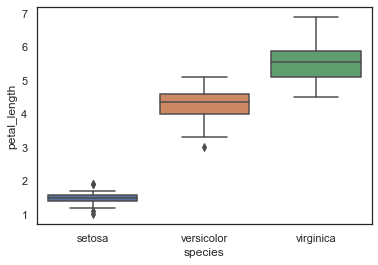

In [68]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris)

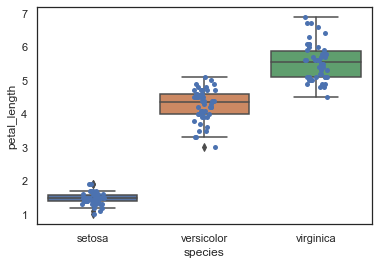

In [69]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='species', ylabel='petal_length'>

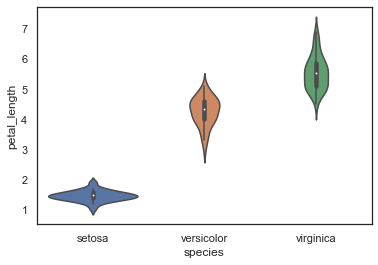

In [70]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

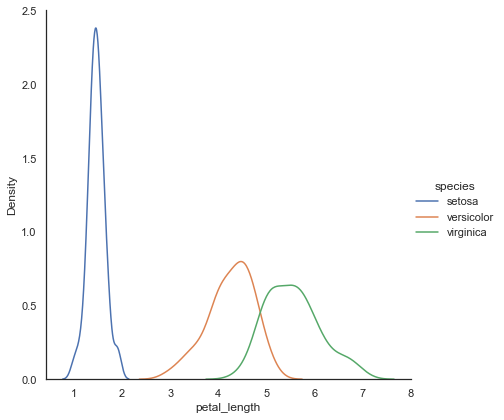

In [71]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species", height=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

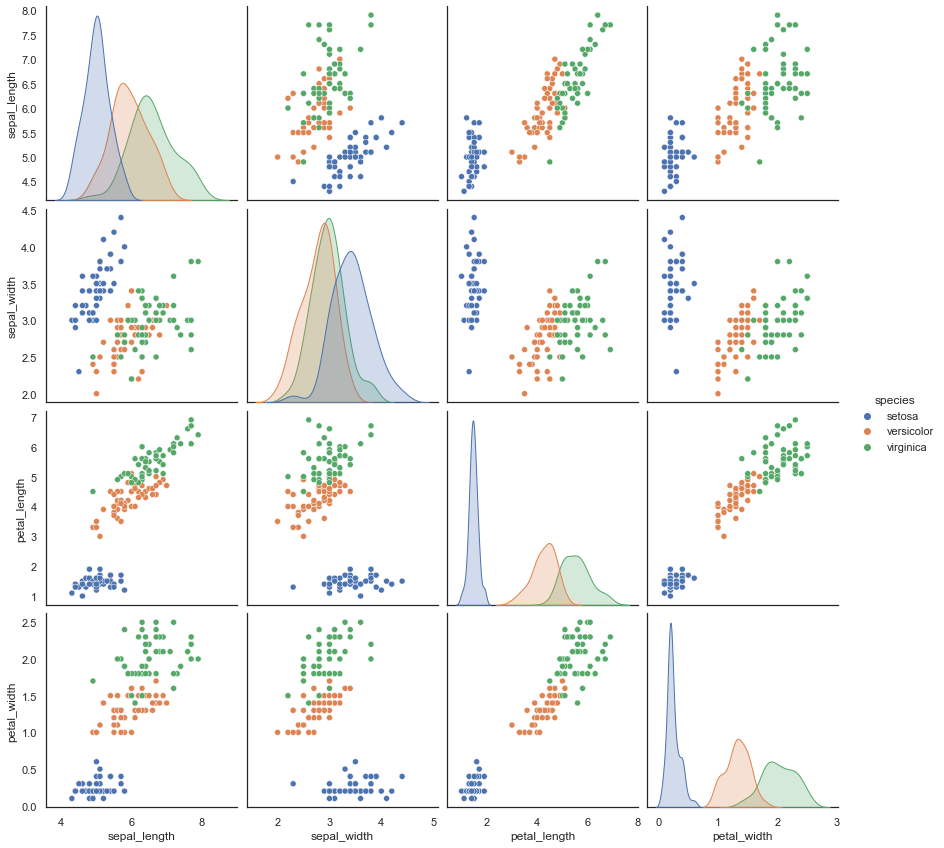

In [72]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(iris, hue="species", size=3)

In [ ]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="species", size=3, kind="kde") # diag_kind="hist"

In [ ]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="species", figsize=(12, 6))

In [ ]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
pd.plotting.andrews_curves(iris, "species")

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
pd.plotting.parallel_coordinates(iris, "species")

In [ ]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
pd.plotting.radviz(iris, "species")

# Wrapping Up

Just try with other dataset!!

See [Kaggle Datasets](https://www.kaggle.com/datasets) for other datasets to try visualizing.